<a href="https://colab.research.google.com/github/ensiehgo/CSE366_2017331030/blob/main/Task%20%2302/LineCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


**Unipolar Scheme**

In [ ]:
def unipolar(inp):
  inp1 = list(inp)
  inp1.insert(0,0)
  return inp1

**Polar Schemes**

In [ ]:
'''
Non Return to Zero Level(NRZ-L)

'''
def polar_nrz_l(inp):
  inp1 = list(inp)
  inp1.insert(0,0)
  inp1 = [-1 if i==0 else 1 for i in inp1]
  return inp1


'''
Non Return to Zero Level(NRZ-I)

'''
def polar_nrz_i(inp):
  inp2 = list(inp)
  inp2.insert(0,0)
  
  for i in range(1,len(inp2)):
      if inp2[i] == 1:
         if inp2[i-1] == 0:
            inp2[i] = 1
         else:
            inp2[i] = 0
      else:
          inp2[i] = inp2[i-1]

  inp2 = [-1 if i==0 else 1 for i in inp2]
  return inp2


'''
Return to Zero

'''
def polar_rz(inp):
  inp1 = list(inp)
  inp1 = [-1 if i==0 else 1 for i in inp1]
  li = []
  for i in range(len(inp1)):
      li.append(inp1[i])
      li.append(0)
  return li


'''
Biphase Manchester

'''
def biphase_manchester(inp):
    inp1 = list(inp)
    li, init = [], False
    
    for i in range(len(inp1)):
        if inp1[i] == 0:
           li.append(-1)
           if not init:
              li.append(-1)
              init = True
           li.append(1)
        
        elif inp1[i] == 1:
             li.append(1)
             li.append(-1)
    return li


'''
Differential Manchester

'''
def differential_manchester(inp):
    
    inp1 = list(inp)
    li,lock,pre=[],False,''
    for i in range(len(inp1)):
        if inp1[i] == 0 and not lock:
           li.append(-1)
           li.append(-1)
           li.append(1)
           lock = True
           pre = 'S'

        elif inp1[i] == 1 and not lock:
             li.append(1)
             li.append(1)
             li.append(-1)
             lock = True
             pre = 'Z'
        
        else:
             if inp1[i] == 0:
                if pre == 'S':
                   li.append(-1); li.append(1)
                else:
                    li.append(1); li.append(-1)
              
             else:
                 if pre == 'Z':
                    pre = 'S'
                    li.append(-1); li.append(1)
                 else:
                    pre = 'Z'
                    li.append(1); li.append(-1)
    return li

**Bipolar Schemes**

In [ ]:
'''
Alternate Mark Inversion

'''
def AMI(inp):
    inp1 = list(inp)
    inp1.insert(0,0)
    lock = False

    for i in range(len(inp1)):
        if inp1[i] == 1 and not lock:
           lock = True
           continue
        elif lock and inp1[i] == 1:
            inp1[i] = -1
            lock = False

    return inp1

'''
Pseudoternary

'''
def pseudoternary(inp):
    inp1 = list(inp)
    inp1.insert(0,0)
    lock = False

    for i in range(len(inp1)):
        if inp1[i] == 0 and not lock:
           inp1[i] = 1
           lock = True
           continue
        elif lock and inp1[i] == 0:
            inp1[i] = -1
            lock = False
        if inp1[i] == 1:
           inp1[i] = 0
            
    return inp1

**Plotting**

In [ ]:
def plot(li):

    plt.figure(figsize=(11, 11))
    plt.subplot(8,1,1)
    plt.ylabel("Unipolar NRZ")
    plt.plot(unipolar(li), color = 'red', drawstyle = 'steps-pre', marker = '>')

    plt.subplot(8,1,2)
    plt.ylabel("Polar NRZ-L")
    plt.plot(polar_nrz_l(li), color = 'blue', drawstyle = 'steps-pre', marker = '>')

    plt.subplot(8,1,3)
    plt.ylabel("Polar NRZ-I")
    plt.plot(polar_nrz_i(li), color = 'green', drawstyle = 'steps-pre', marker = '>')

    plt.subplot(8,1,4)
    plt.ylabel("Polar RZ")
    plt.plot(polar_rz(li), color = 'red', drawstyle = 'steps-pre', marker = '>')

    plt.subplot(8,1,5)
    plt.ylabel("B-Manchester")
    plt.plot(biphase_manchester(li), color = 'violet', drawstyle = 'steps-pre', marker = '>')

    plt.subplot(8,1,6)
    plt.ylabel("Diff-Manchester")
    plt.plot(differential_manchester(li), color = 'red', drawstyle = 'steps-pre', marker = '>')

    plt.subplot(8,1,7)
    plt.ylabel("AMI")
    plt.plot(AMI(li), color = 'blue', drawstyle = 'steps-pre', marker = '>')
  
    plt.subplot(8,1,8)
    plt.ylabel("Pseudoternary")
    plt.plot(pseudoternary(li), color = 'violet', drawstyle = 'steps-pre', marker = '>')


    plt.tight_layout()
    plt.show()

Enter the size of Encoded Data : 
8
0
1
0
0
1
1
1
0


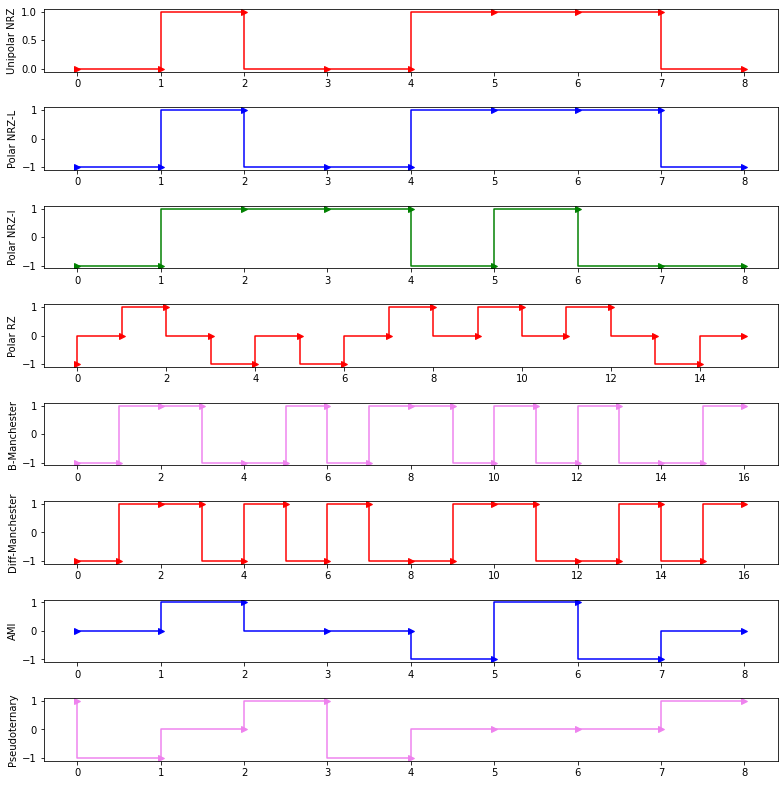

In [ ]:
if __name__=='__main__':
    print("Enter the size of Encoded Data : ")
    size=int(input())
    li=[]
    for i in range(size):
        li.append(int(input()))
   
    plot(li) 
#0